In [1]:
import pandas as pd
import numpy as np
from markdown import markdown
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import glob, os
from os import path
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
%matplotlib inline

In [2]:

lst=[]
os.chdir("C:/Users/Yash/TED-Talks/cleaned_ted_data/Titles_starting_0_to_9/")
for file in glob.glob("*.md"):
    lst.append(file)

In [3]:
lst

['10_myths_about_psychology_debunked_Ben_Ambridge.md',
 "10_things_you_didn't_know_about_orgasm_Mary_Roach.md",
 '10_top_time_saving_tech_tips_David_Pogue.md',
 '10_ways_to_have_a_better_conversation_Celeste_Headlee.md',
 '12_sustainable_design_ideas_from_nature_Janine_Benyus.md',
 '12_truths_I_learned_from_life_and_writing_Anne_Lamott.md',
 '3_clues_to_understanding_your_brain_VS_Ramachandran.md',
 "3_fears_about_screen_time_for_kids_and_why_they're_not_true_Sara_DeWitt.md",
 '3_lessons_on_success_from_an_Arab_businesswoman_Leila_Hoteit.md',
 '3_moons_and_a_planet_that_could_have_alien_life_James_Green.md',
 '3_principles_for_creating_safer_AI_Stuart_Russell.md',
 '3_reasons_why_we_can_win_the_fight_against_poverty_Andrew_Youn.md',
 '3_rules_to_spark_learning_Ramsey_Musallam.md',
 '3_things_I_learned_while_my_plane_crashed_Ric_Elias.md',
 '3_ways_the_brain_creates_meaning_Tom_Wujec.md',
 '3_ways_to_fix_a_broken_news_industry_Lara_Setrakian.md',
 '3_ways_to_plan_for_the_very_long_term_

In [4]:
master=[]
for fname in lst:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html).findAll(text=True))
        text = text.replace('\n',' ')
        master.append(text)

C:\Users\Yash\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Yash\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [5]:
print(len(lst))
print(len(master))

32
32


In [6]:
df = pd.DataFrame(data=master)

In [7]:
df['title'] = lst

In [8]:
df.head()

,0,title
0,"You've heard of your I.Q., your general intell...",10_myths_about_psychology_debunked_Ben_Ambridg...
1,Alright. I'm going to show you a couple of ima...,10_things_you_didn't_know_about_orgasm_Mary_Ro...
2,Translator: Joseph Geni Reviewer: Morton Bast ...,10_top_time_saving_tech_tips_David_Pogue.md
3,"All right, I want to see a show of hands: how ...",10_ways_to_have_a_better_conversation_Celeste_...
4,It is a thrill to be here at a conference that...,12_sustainable_design_ideas_from_nature_Janine...


In [9]:
df.columns=['Content','Title']

In [10]:
df.head()

,Content,Title
0,"You've heard of your I.Q., your general intell...",10_myths_about_psychology_debunked_Ben_Ambridg...
1,Alright. I'm going to show you a couple of ima...,10_things_you_didn't_know_about_orgasm_Mary_Ro...
2,Translator: Joseph Geni Reviewer: Morton Bast ...,10_top_time_saving_tech_tips_David_Pogue.md
3,"All right, I want to see a show of hands: how ...",10_ways_to_have_a_better_conversation_Celeste_...
4,It is a thrill to be here at a conference that...,12_sustainable_design_ideas_from_nature_Janine...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(stop_words='english')

In [13]:
X = tfidf.fit_transform(df.iloc[:,0])

In [14]:
X

<32x6804 sparse matrix of type '<class 'numpy.float64'>'
	with 15227 stored elements in Compressed Sparse Row format>

In [15]:
tfidf.get_feature_names()

['000',
 '08',
 '10',
 '100',
 '10s',
 '10th',
 '11',
 '11th',
 '12',
 '13',
 '14',
 '140',
 '15',
 '15th',
 '16',
 '1656',
 '17',
 '175',
 '18',
 '180',
 '1859',
 '1900s',
 '1930s',
 '1940s',
 '1950s',
 '1951',
 '1954',
 '1960',
 '1960s',
 '1975',
 '1977',
 '1980s',
 '1983',
 '1984',
 '1985',
 '1987',
 '1990s',
 '1996',
 '1999',
 '19th',
 '1d',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2012',
 '2014',
 '2015',
 '2016',
 '2050',
 '206',
 '20s',
 '20th',
 '21',
 '21st',
 '22',
 '225',
 '23',
 '230',
 '24',
 '25',
 '250',
 '26',
 '275',
 '28',
 '30',
 '300',
 '30pm',
 '32',
 '33',
 '35',
 '35w',
 '36',
 '37',
 '40',
 '400',
 '41',
 '42',
 '420',
 '45',
 '47',
 '48',
 '50',
 '500',
 '58',
 '60',
 '600',
 '60s',
 '61st',
 '65',
 '650',
 '66',
 '6x',
 '70',
 '70s',
 '72',
 '75',
 '7pm',
 '80',
 '80s',
 '90',
 '96',
 '98',
 'abandoned',
 'abc',
 'abdicated',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'abnormalities',
 'abode',
 'a

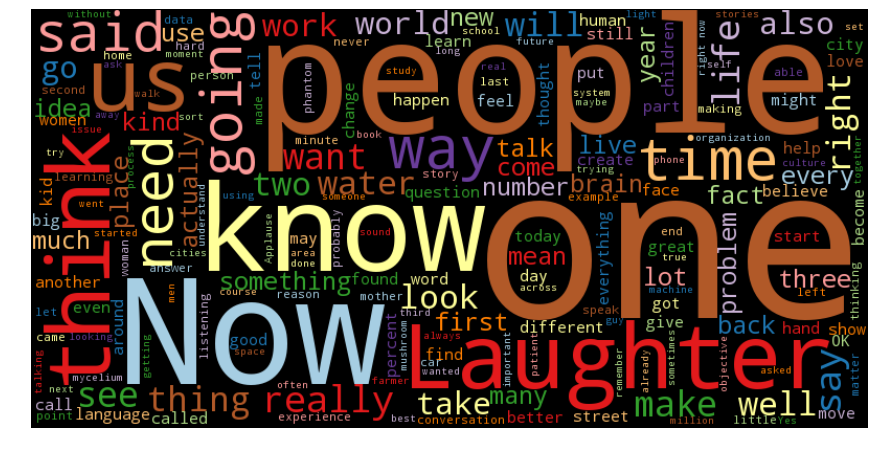

In [16]:

wordcloud = WordCloud(stopwords=STOPWORDS,relative_scaling=.4,
                          background_color='black',
                          width=800,
                          height=400,colormap='Paired')


wordcloud = wordcloud.generate(''.join(master))

#wordcloud.to_file("cloud.png")
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
lst1=[]
os.chdir("C:/Users/Yash/TED-Talks/cleaned_ted_data/Titles_starting_A_to_O/")
for file in glob.glob("*.md"):
    lst1.append(file)
    
master1=[]
for fname in lst1:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html).findAll(text=True))
        text = text.replace('\n',' ')
        master1.append(text)

lst2=[]
os.chdir("C:/Users/Yash/TED-Talks/cleaned_ted_data/Titles_starting_P_to_Z/")
for file in glob.glob("*.md"):
    lst2.append(file)
    
master2=[]
for fname in lst2:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html).findAll(text=True))
        text = text.replace('\n',' ')
        master2.append(text)

C:\Users\Yash\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Yash\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [18]:
print(len(lst1))
print(len(master1))
print(len(lst2))
print(len(master2))

1583
1583
883
883


In [19]:
master_lst = lst + lst1 + lst2

In [20]:
len(master_lst)

2498

In [21]:
final_master = master + master1 + master2

In [22]:
len(final_master)

2498

In [23]:
df1 = pd.DataFrame(data=final_master)

In [24]:
df1['Title'] = master_lst

In [25]:
df1.columns=['Content','Title']

In [26]:
df1.head()

,Content,Title
0,"You've heard of your I.Q., your general intell...",10_myths_about_psychology_debunked_Ben_Ambridg...
1,Alright. I'm going to show you a couple of ima...,10_things_you_didn't_know_about_orgasm_Mary_Ro...
2,Translator: Joseph Geni Reviewer: Morton Bast ...,10_top_time_saving_tech_tips_David_Pogue.md
3,"All right, I want to see a show of hands: how ...",10_ways_to_have_a_better_conversation_Celeste_...
4,It is a thrill to be here at a conference that...,12_sustainable_design_ideas_from_nature_Janine...


In [ ]:
df1.tail()

,Content,Title
2493,I have 18 minutes to tell you what happened ov...,Zeresenay_Alemseged_Finding_the_origins_of_hum...
2494,"So recently, we heard a lot about how social m...",Zeynep_Tufekci_How_the_Internet_has_made_socia...
2495,Every presentation needs this slide in it. (La...,Ze_Frank's_web_playroom.md
2496,"(Music) This is the human test, a test to see ...",Ze_Frank_Are_you_human.md
2497,"These are simple objects: clocks, keys, combs,...",Ziyah_Gafić_Everyday_objects_tragic_histories.md


In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,relative_scaling=.4,
                          background_color='black',
                          width=800,
                          height=400,colormap='Paired')


wordcloud = wordcloud.generate(''.join(final_master))

wordcloud.to_file("C:/Users/Yash/TED-Talks/ted_cloud.png")
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
X

In [ ]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [ ]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [ ]:
for i in range(len(lst)):
    print(top_feats_in_doc(X,tfidf.get_feature_names(), i),'\n')
    print(lst[i],'\n')

In [ ]:
df1.to_pickle("C:/Users/Yash/TED-Talks/ted.pkl")